# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp7 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1321799997650800641
1321799998628134913
1321799999320215552
1321799999865442304
1321800001165512706
1321800001182261248
1321800001454972928
1321800001433919488
1321800001652183040
1321800002046361600
1321800002277179393
1321800003401195526
1321800004701351936
1321800004932128768
1321800005364187140
1321800005515055104
1321800005880107008
1321800005909360641
1321800006165237767
1321800006853136384
1321800007545167878
1321800007876575232
1321800009730306049
1321800010321649664
1321800010330185731
1321800010279931912
1321800011496235008
1321800011655634944
1321800011651436544
1321800012842606594
1321800013039718404
1321800014017011714
1321800015212355584
1321800015430471684
1321800015707316225
1321800015799529473
1321800015799414784
1321800015413727232
1321800016139182081
1321800016646840321
1321800016655208449
1321800016760131586
1321800017036955648
1321800016894328832
1321800019226333185
1321800019758977024
1321800019922530305
1321800020178444291
1321800020157329410
1321800020912320512


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:31 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:30 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:29 +0000 2020'
'Thu Oct 29 13:08:28 +0000 2020'
'Thu Oct 29 13:08:28 +0000 2020'
'Thu Oct 29 13:08:28 +0000 2020'
'Thu Oct 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:18 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:17 +0000 2020'
'Thu Oct 29 13:08:16 +0000 2020'
'Thu Oct 29 13:08:16 +0000 2020'
'Thu Oct 29 13:08:16 +0000 2020'
'Thu Oct 29 13:08:16 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:15 +0000 2020'
'Thu Oct 29 13:08:14 +0000 2020'
'Thu Oct 29 13:08:14 +0000 2020'
'Thu Oct 29 13:08:14 +0000 2020'
'Thu Oct 29 13:08:14 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:07:42 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:41 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:40 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:39 +0000 2020'
'Thu Oct 29 13:07:38 +0000 2020'
'Thu Oct 29 13:07:38 +0000 2020'
'Thu Oct 29 13:07:38 +0000 2020'
'Thu Oct 29 13:07:38 +0000 2020'
'Thu Oct 29 13:07:38 +0000 2020'
'Thu Oct 29 13:07:37 +0000 2020'
'Thu Oct 29 13:07:37 +0000 2020'
'Thu Oct 29 13:07:37 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:06 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:05 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:04 +0000 2020'
'Thu Oct 29 13:07:03 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:06:35 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:34 +0000 2020'
'Thu Oct 29 13:06:33 +0000 2020'
'Thu Oct 29 13:06:33 +0000 2020'
'Thu Oct 29 13:06:33 +0000 2020'
'Thu Oct 29 13:06:33 +0000 2020'
'Thu Oct 29 13:06:33 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:32 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:31 +0000 2020'
'Thu Oct 29 13:06:30 +0000 2020'
'Thu Oct 29 13:06:30 +0000 2020'
'Thu Oct 29 13:06:30 +0000 2020'
'Thu Oct 29 13:06:30 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:05:56 +0000 2020'
'Thu Oct 29 13:05:56 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:55 +0000 2020'
'Thu Oct 29 13:05:54 +0000 2020'
'Thu Oct 29 13:05:54 +0000 2020'
'Thu Oct 29 13:05:54 +0000 2020'
'Thu Oct 29 13:05:54 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:53 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:52 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 29 13:05:51 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:05:19 +0000 2020'
'Thu Oct 29 13:05:19 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:18 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:17 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 29 13:05:16 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:44 +0000 2020'
'Thu Oct 29 13:04:43 +0000 2020'
'Thu Oct 29 13:04:17 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:11 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:10 +0000 2020'
'Thu Oct 29 13:04:09 +0000 2020'
'Thu Oct 29 13:04:08 +0000 2020'
'Thu Oct 29 13:04:08 +0000 2020'
'Thu Oct 29 13:04:08 +0000 2020'
'Thu Oct 29 13:04:08 +0000 2020'
'Thu Oct 29 13:04:08 +0000 2020'
'Thu Oct 29 13:04:07 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:37 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:36 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:35 +0000 2020'
'Thu Oct 29 13:03:34 +0000 2020'
'Thu Oct 29 13:03:34 +0000 2020'
'Thu Oct 29 13:03:34 +0000 2020'
'Thu Oct 29 13:03:34 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:03:01 +0000 2020'
'Thu Oct 29 13:03:01 +0000 2020'
'Thu Oct 29 13:03:01 +0000 2020'
'Thu Oct 29 13:03:01 +0000 2020'
'Thu Oct 29 13:03:01 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:03:00 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:59 +0000 2020'
'Thu Oct 29 13:02:58 +0000 2020'
'Thu Oct 29 13:02:58 +0000 2020'
'Thu Oct 29 13:02:58 +0000 2020'
'Thu Oct 29 13:02:58 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:02:27 +0000 2020'
'Thu Oct 29 13:02:27 +0000 2020'
'Thu Oct 29 13:02:26 +0000 2020'
'Thu Oct 29 13:02:26 +0000 2020'
'Thu Oct 29 13:02:26 +0000 2020'
'Thu Oct 29 13:02:26 +0000 2020'
'Thu Oct 29 13:02:26 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:25 +0000 2020'
'Thu Oct 29 13:02:24 +0000 2020'
'Thu Oct 29 13:02:24 +0000 2020'
'Thu Oct 29 13:02:24 +0000 2020'
'Thu Oct 29 13:02:24 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 29 13:02:23 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:52 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:51 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:50 +0000 2020'
'Thu Oct 29 13:01:49 +0000 2020'
'Thu Oct 29 13:01:49 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:01:17 +0000 2020'
'Thu Oct 29 13:01:16 +0000 2020'
'Thu Oct 29 13:01:16 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:15 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:14 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:13 +0000 2020'
'Thu Oct 29 13:01:12 +0000 2020'
'Thu Oct 29 13:01:12 +0000 2020'
'Thu Oct 29 13:01:12 +0000 2020'
'Thu Oct 29 13:01:12 +0000 2020'
'Thu Oct 29 13:01:12 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:00:42 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:41 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:40 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:39 +0000 2020'
'Thu Oct 29 13:00:38 +0000 2020'
'Thu Oct 29 13:00:38 +0000 2020'
'Thu Oct 2

'Thu Oct 29 13:00:12 +0000 2020'
'Thu Oct 29 13:00:12 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:11 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:10 +0000 2020'
'Thu Oct 29 13:00:09 +0000 2020'
'Thu Oct 29 13:00:09 +0000 2020'
'Thu Oct 29 13:00:09 +0000 2020'
'Thu Oct 29 13:00:09 +0000 2020'
'Thu Oct 29 13:00:09 +0000 2020'
'Thu Oct 29 13:00:08 +0000 2020'
'Thu Oct 29 13:00:08 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 29 13:00:07 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:59:46 +0000 2020'
'Thu Oct 29 12:59:46 +0000 2020'
'Thu Oct 29 12:59:46 +0000 2020'
'Thu Oct 29 12:59:46 +0000 2020'
'Thu Oct 29 12:59:45 +0000 2020'
'Thu Oct 29 12:59:45 +0000 2020'
'Thu Oct 29 12:59:45 +0000 2020'
'Thu Oct 29 12:59:45 +0000 2020'
'Thu Oct 29 12:59:45 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:44 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:43 +0000 2020'
'Thu Oct 29 12:59:42 +0000 2020'
'Thu Oct 29 12:59:42 +0000 2020'
'Thu Oct 29 12:59:42 +0000 2020'
'Thu Oct 29 12:59:42 +0000 2020'
'Thu Oct 29 12:59:42 +0000 2020'
'Thu Oct 29 12:59:41 +0000 2020'
'Thu Oct 29 12:59:41 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:59:06 +0000 2020'
'Thu Oct 29 12:59:06 +0000 2020'
'Thu Oct 29 12:59:06 +0000 2020'
'Thu Oct 29 12:59:06 +0000 2020'
'Thu Oct 29 12:59:06 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:05 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:04 +0000 2020'
'Thu Oct 29 12:59:03 +0000 2020'
'Thu Oct 29 12:59:03 +0000 2020'
'Thu Oct 29 12:59:03 +0000 2020'
'Thu Oct 29 12:59:03 +0000 2020'
'Thu Oct 29 12:59:03 +0000 2020'
'Thu Oct 29 12:59:02 +0000 2020'
'Thu Oct 29 12:59:02 +0000 2020'
'Thu Oct 29 12:59:02 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:58:31 +0000 2020'
'Thu Oct 29 12:58:31 +0000 2020'
'Thu Oct 29 12:58:31 +0000 2020'
'Thu Oct 29 12:58:31 +0000 2020'
'Thu Oct 29 12:58:31 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:30 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:29 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:28 +0000 2020'
'Thu Oct 29 12:58:27 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:56 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:55 +0000 2020'
'Thu Oct 29 12:57:54 +0000 2020'
'Thu Oct 29 12:57:54 +0000 2020'
'Thu Oct 29 12:57:54 +0000 2020'
'Thu Oct 29 12:57:54 +0000 2020'
'Thu Oct 29 12:57:54 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 29 12:57:53 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:18 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:17 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 29 12:57:16 +0000 2020'
'Thu Oct 2

'Thu Oct 29 12:56:45 +0000 2020'
'Thu Oct 29 12:56:45 +0000 2020'
'Thu Oct 29 12:56:44 +0000 2020'
'Thu Oct 29 12:56:44 +0000 2020'
'Thu Oct 29 12:56:44 +0000 2020'
'Thu Oct 29 12:56:44 +0000 2020'
'Thu Oct 29 12:56:43 +0000 2020'
'Thu Oct 29 12:56:43 +0000 2020'
'Thu Oct 29 12:56:43 +0000 2020'
'Thu Oct 29 12:56:43 +0000 2020'
'Thu Oct 29 12:56:43 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:42 +0000 2020'
'Thu Oct 29 12:56:41 +0000 2020'
'Thu Oct 29 12:56:41 +0000 2020'
'Thu Oct 29 12:56:41 +0000 2020'
'Thu Oct 29 12:56:41 +0000 2020'
'Thu Oct 29 12:56:41 +0000 2020'
'Thu Oct 29 12:56:40 +0000 2020'
'Thu Oct 29 12:56:39 +0000 2020'
'Thu Oct 29 12:56:39 +0000 2020'
'Thu Oct 29 12:56:39 +0000 2020'
'Thu Oct 29 12:56:38 +0000 2020'
'Thu Oct 2

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [11]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5427
4951


Create a text index and print the Tweets containing specific keywords. 

In [12]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [13]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [14]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: circa metwo
text: Dentist, Doctors sighted ( but only in Comics )
Virtual Elective
#COVID19 
Type in your own words https://t.co/yEcCk1CHAe
----
name: lost&found
text: @piersmorgan This election is about COVID19 but poor old piers his besty chum is in trouble so he is relying on Agence France Press
----
name: (((Rich Stein)))Be😷Safe🦠Test&Trace*Chiffrephile*
text: How to triage when there are two pressing crises like #COVID19 and the most important election in our lifetimes?… https://t.co/2MN6R9ILuA
----
name: Jeff
text: RT @nickmangwana: @munyati01 Imagine there are riots, looting and street death in one country - no comment
There are elections in another c…
----
name: U A CONNEL
text: RT @ChidiOdinkalu: In #Nigeria, governors who have bn elected to look after the wellbeing of poor citizens decided to starve their ppl by h…
----
name: Muhammadu Makintami™
text: RT @ChidiOdinkalu: In #Nigeria, governors who have bn elected to look after the wellbeing of poor citizens decided 

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [16]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,lang,quoted_status_id,quoted_status_id_str,quoted_status,retweeted_status,quote_count,reply_count,filter_level,timestamp_ms,quoted_status_permalink
0,5f9abf8a75476d06adc3f712,Thu Oct 29 12:57:17 +0000 2020,1321798258205822979,1321798258205822979,"Dentist, Doctors sighted ( but only in Comics ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'media': [{'id': 1321798231400108032, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9abf7975476d06adc3f19c,Thu Oct 29 13:00:19 +0000 2020,1321799021447553024,1321799021447553024,@piersmorgan This election is about COVID19 bu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9abf4e75476d06adc3e382,Thu Oct 29 13:08:17 +0000 2020,1321801027373420545,1321801027373420545,How to triage when there are two pressing cris...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,en,1.321570e+18,1321570174391054336,{'created_at': 'Wed Oct 28 21:50:57 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,5f9abf7e75476d06adc3f353,Thu Oct 29 12:59:30 +0000 2020,1321798815666589699,1321798815666589699,RT @nickmangwana: @munyati01 Imagine there are...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 03:45:07 +0000 2020...,NaN,NaN,NaN,NaN,NaN
4,5f9abf6675476d06adc3eb98,Thu Oct 29 13:03:40 +0000 2020,1321799866813730816,1321799866813730816,"RT @ChidiOdinkalu: In #Nigeria, governors who ...",False,"{'hashtags': [{'text': 'Nigeria', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 13:02:45 +0000 2020...,NaN,NaN,NaN,NaN,NaN
5,5f9abf6575476d06adc3eb29,Thu Oct 29 13:03:56 +0000 2020,1321799930827202561,1321799930827202561,"RT @ChidiOdinkalu: In #Nigeria, governors who ...",False,"{'hashtags': [{'text': 'Nigeria', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 13:02:45 +0000 2020...,NaN,NaN,NaN,NaN,NaN
6,5f9abf6475476d06adc3eaea,Thu Oct 29 13:04:03 +0000 2020,1321799963999948800,1321799963999948800,"RT @ChidiOdinkalu: In #Nigeria, governors who ...",False,"{'hashtags': [{'text': 'Nigeria', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 13:02:45 +0000 2020...,NaN,NaN,NaN,NaN,NaN
7,5f9abf5e75476d06adc3e890,Thu Oct 29 13:05:21 +0000 2020,1321800288748142597,1321800288748142597,"RT @ChidiOdinkalu: In #Nigeria, governors who ...",False,"{'hashtags': [{'text': 'Nigeria', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 13:02:45 +0000 2020...,NaN,NaN,NaN,NaN,NaN
8,5f9abf5d75476d06adc3e850,Thu Oct 29 13:05:32 +0000 2020,1321800333857837057,1321800333857837057,"RT @ChidiOdinkalu: In #Nigeria, governors who ...",False,"{'hashtags': [{'text': 'Nigeria', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,en,NaN,NaN,NaN,{'created_at': 'Thu Oct 29 13:02:45 +0000 2020...,NaN,NaN,NaN,NaN,NaN
9,5f9abf5775476d06adc3e648,Thu Oct 29 13:06:44 +0000 2020,1321800638288830464,1321800638288830464,RT @TomBollyky: Great anal

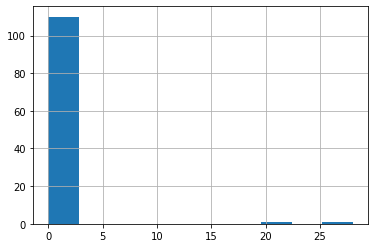

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count